# Converting photometry table from interactive photometry tool to a light curve

-Example WASP-36 b


Code Improvement notes
- needs ability to remove miss-clicked stars
- a guess for identical psf locations on next frame with ability to edit if they look incorrect
- ^reuse previous aperatures option? 
- update on psf photometry click not next click (prob with last frame)
- start next frame at same zoom level
- Save table to csv
- print statement on interface?
- quality flag button

New Code improvement notes
- still needs save dataframe to csv command
- Dropped observation time column? Not cool 
- still needs an undo star selection option 




In [1]:
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.time import Time

Point to reduced data path, or wherever frame_info and photometry results were saved

In [12]:
!pwd

/Users/bencapistrant/Documents/GitHub/rho_data_reduction_pipeline/photometry_mplw


In [6]:
path = '/Users/bencapistrant/Documents/GitHub/rho_data_reduction_pipeline/data/WASP36b/New_Reduced/'

In [7]:
raw = pd.read_csv(path+'psf_photometry_results.csv')
raw

,File,Date-Obs,Star_1_x,Star_1_y,Star_1_flux,Star_1_noise,Star_2_x,Star_2_y,Star_2_flux,Star_2_noise,Star_3_x,Star_3_y,Star_3_flux,Star_3_noise,Star_4_x,Star_4_y,Star_4_flux,Star_4_noise
0,WASP36B.2025-02-17.0132_reduced.fits,2025-02-18T01:44:30.345,543,406,248148.373025,557.779756,425,340,277059.193168,586.527503,545,279,147308.630889,461.161334,541,616,455174.475747,722.585493
1,WASP36B.2025-02-17.0167_reduced.fits,2025-02-18T03:15:50.730,543,406,256513.337869,565.228468,425,340,283759.848108,588.837611,545,279,152152.029449,462.952293,541,616,478637.170392,738.102569
2,WASP36B.2025-02-17.0135_reduced.fits,2025-02-18T01:52:14.432,543,406,274211.949259,584.095256,425,340,300636.051622,606.293139,545,279,158203.194669,469.442213,541,616,490090.515728,745.286294
3,WASP36B.2025-02-17.0160_reduced.fits,2025-02-18T02:57:57.963,543,406,233516.889818,539.358103,425,340,257913.618336,560.097954,545,279,136459.106761,435.733800,541,616,428910.228710,696.208538
4,WASP36B.2025-02-17.0175_reduced.fits,2025-02-18T03:36:17.242,543,406,242224.496221,550.275493,425,340,265394.862510,570.940877,545,279,143407.289396,452.529556,541,616,449449.291878,716.391138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,WASP36B.2025-02-17.0188_reduced.fits,2025-02-18T04:09:30.453,543,406,229046.625134,538.908466,425,340,246652.054844,553.564441,545,279,134835.765049,442.957644,541,616,421988.607110,697.533271
59,WASP36B.2025-02-17.0141_reduced.fits,2025-02-18T02:07:33.394,543,406,83713.392226,321.932556,425,340,100943.869302,351.087324,545,279,52101.518909,271.335349,541,616,165252.308999,433.094388
60,WASP36B.2025-02-17.0146_reduced.fits,2025-02-18T02:21:08.186,543,406,249355.830614,558.147496,425,340,287800.699188,596.282740,545,279,148843.054258,459.364616,541,616,464965.682556,726.591746
61,WASP36B.2025-02-17.0153_reduced.fits,2025-02-18T02:39:07.041,543,406,252224.607265,562.839822,425,340,284211.035057,590.571835,545,279,150788.265093,463.201075,541,616,468305.664672,729.433092


In [8]:
obs_info = pd.read_csv(path+'frame_info.csv')
obs_info

,Directory,File,Object,Date-Obs,Filter,Exptime,Dark Current,Read Noise,Flat Noise
0,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0132_reduced.fits,WASP-36B,2025-02-18T01:44:30.345,R,150.0,9.886016,42.597653,0.053058
1,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0167_reduced.fits,WASP-36B,2025-02-18T03:15:50.730,R,150.0,9.886016,42.597653,0.053058
2,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0135_reduced.fits,WASP-36B,2025-02-18T01:52:14.432,R,150.0,9.886016,42.597653,0.053058
3,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0160_reduced.fits,WASP-36B,2025-02-18T02:57:57.963,R,150.0,9.886016,42.597653,0.053058
4,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0175_reduced.fits,WASP-36B,2025-02-18T03:36:17.242,R,150.0,9.886016,42.597653,0.053058
...,...,...,...,...,...,...,...,...,...
58,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0188_reduced.fits,WASP-36B,2025-02-18T04:09:30.453,R,150.0,9.886016,42.597653,0.053058
59,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0141_reduced.fits,WASP-36B,2025-02-18T02:07:33.394,R,150.0,9.886016,42.597653,0.053058
60,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0146_reduced.fits,WASP-36B,2025-02-18T02:21:08.186,R,150.0,9.886016,42.597653,0.053058
61,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0153_reduced.fits,WASP-36B,2025-02-18T02:39:07.041,R,150.0,9.886016,42.597653,0.053058


In [320]:
# obs_info.sort_values(by='Date-Obs')

In [10]:
# combined = pd.merge(raw, obs_info, left_on='File', right_on='File', how='left').sort_values(by='Date-Obs').reset_index(drop=True)
combined = pd.read_csv(path+'psf_photometry_results.csv')
combined

,File,Date-Obs,Star_1_x,Star_1_y,Star_1_flux,Star_1_noise,Star_2_x,Star_2_y,Star_2_flux,Star_2_noise,Star_3_x,Star_3_y,Star_3_flux,Star_3_noise,Star_4_x,Star_4_y,Star_4_flux,Star_4_noise
0,WASP36B.2025-02-17.0132_reduced.fits,2025-02-18T01:44:30.345,543,406,248148.373025,557.779756,425,340,277059.193168,586.527503,545,279,147308.630889,461.161334,541,616,455174.475747,722.585493
1,WASP36B.2025-02-17.0167_reduced.fits,2025-02-18T03:15:50.730,543,406,256513.337869,565.228468,425,340,283759.848108,588.837611,545,279,152152.029449,462.952293,541,616,478637.170392,738.102569
2,WASP36B.2025-02-17.0135_reduced.fits,2025-02-18T01:52:14.432,543,406,274211.949259,584.095256,425,340,300636.051622,606.293139,545,279,158203.194669,469.442213,541,616,490090.515728,745.286294
3,WASP36B.2025-02-17.0160_reduced.fits,2025-02-18T02:57:57.963,543,406,233516.889818,539.358103,425,340,257913.618336,560.097954,545,279,136459.106761,435.733800,541,616,428910.228710,696.208538
4,WASP36B.2025-02-17.0175_reduced.fits,2025-02-18T03:36:17.242,543,406,242224.496221,550.275493,425,340,265394.862510,570.940877,545,279,143407.289396,452.529556,541,616,449449.291878,716.391138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,WASP36B.2025-02-17.0188_reduced.fits,2025-02-18T04:09:30.453,543,406,229046.625134,538.908466,425,340,246652.054844,553.564441,545,279,134835.765049,442.957644,541,616,421988.607110,697.533271
59,WASP36B.2025-02-17.0141_reduced.fits,2025-02-18T02:07:33.394,543,406,83713.392226,321.932556,425,340,100943.869302,351.087324,545,279,52101.518909,271.335349,541,616,165252.308999,433.094388
60,WASP36B.2025-02-17.0146_reduced.fits,2025-02-18T02:21:08.186,543,406,249355.830614,558.147496,425,340,287800.699188,596.282740,545,279,148843.054258,459.364616,541,616,464965.682556,726.591746
61,WASP36B.2025-02-17.0153_reduced.fits,2025-02-18T02:39:07.041,543,406,252224.607265,562.839822,425,340,284211.035057,590.571835,545,279,150788.265093,463.201075,541,616,468305.664672,729.433092


In [322]:
from itertools import product
import pickle

import ipywidgets as ipw
import numpy as np

from matplotlib import pyplot as plt
from astropy.table import Table

from stellarphot.analysis.transit_fitting import TransitModelFit
from stellarphot.visualization.transit_plots import *
from stellarphot.visualization.fits_opener import FitsOpener

from astropy.timeseries import BinnedTimeSeries, TimeSeries, aggregate_downsample
from astropy.time import Time
from astropy.table import Table 
from astropy import units as u

In [323]:
# fo = FitsOpener(title="Select your photometry/flux file", filter_pattern=["*.csv", "*.fits"])

In [11]:
t =[]
for i in range(len(combined)):
    t.append(Time(combined.at[i, 'Date-Obs'], format='isot', scale='utc').jd)

sorted_indices = np.argsort(t)


In [12]:
# np.array(t)[sorted_indices]

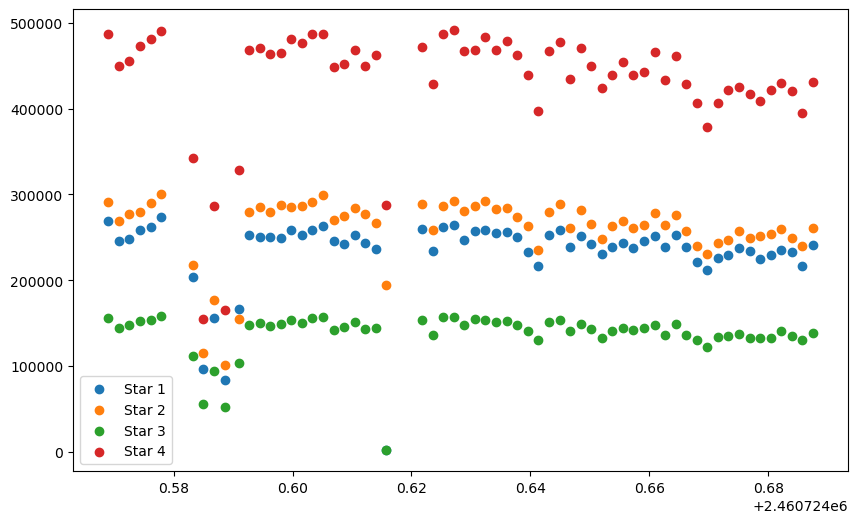

In [13]:
plt.figure(figsize=(10, 6))
# for i in [0,1,2,3,4,5,6,7,]:
for i in [0,1,2,3,]:
    plt.scatter(t,combined[f'Star_{i+1}_flux'],label=f'Star {i+1}')
    # plt.scatter(np.array(t)[sorted_indices], combined[f'Star_{i+1}_flux'][sorted_indices], marker='x', label=f'Star {i+1} sorted')
    # print(i)
# plt.scatter(t, wasp36['sum_flux'],label='WASP-36b',)
# [plt.scatter(t, refs[i]['sum_flux'], marker='x',label=f'ref {i+1}') for i in range(len(refs))]
    plt.legend()    

In [26]:
# refs = [6,7,8]
refs = [2,3,]
# refs = [2,4,6]
ref_flux = np.array([combined[f'Star_{i}_flux'].values for i in refs])
ref_err = np.sqrt(np.sum(np.array([combined[f'Star_{i}_noise'].values**2 for i in refs]),axis=0))
ref_corr = ref_flux.sum(axis=0)

In [27]:
wasp36_flux = combined['Star_1_flux'] / ref_corr
wasp36_err = wasp36_flux*np.sqrt((combined['Star_1_noise']/combined['Star_1_flux'])**2 + (ref_err/ref_corr)**2)

In [28]:
# Sort wasp36_flux and t by time order
sorted_indices = np.argsort(t)
wasp36_flux_sorted = wasp36_flux.values[sorted_indices]
wasp36_err_sorted = wasp36_err.values[sorted_indices]
t_sorted = np.array(t)[sorted_indices]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [35]:
t_sorted

array([2460724.56901608, 2460724.57079479, 2460724.57257344,
       2460724.57436356, 2460724.57613755, 2460724.57794481,
       2460724.58326677, 2460724.58503203, 2460724.58680341,
       2460724.58858095, 2460724.59092809, 2460724.59270366,
       2460724.59447071, 2460724.5962376 , 2460724.59801141,
       2460724.59978072, 2460724.60157925, 2460724.60335084,
       2460724.60514841, 2460724.60692013, 2460724.60871484,
       2460724.61049816, 2460724.61226271, 2460724.61403204,
       2460724.61579679, 2460724.62181824, 2460724.62358753,
       2460724.62535462, 2460724.62713028, 2460724.62890639,
       2460724.63066876, 2460724.63244024, 2460724.63422929,
       2460724.63600382, 2460724.63777763, 2460724.63955169,
       2460724.64134696, 2460724.64312075, 2460724.64489624,
       2460724.64666786, 2460724.64843257, 2460724.65019956,
       2460724.65196323, 2460724.6537434 , 2460724.65552888,
       2460724.65730388, 2460724.65908473, 2460724.66085407,
       2460724.66263409,

In [30]:
wasp36_err

0     0.001669
1     0.001644
2     0.001618
3     0.001734
4     0.001711
        ...   
58    0.001800
59    0.002634
60    0.001613
61    0.001636
62    0.001663
Length: 63, dtype: float64

(0.95, 1.04)

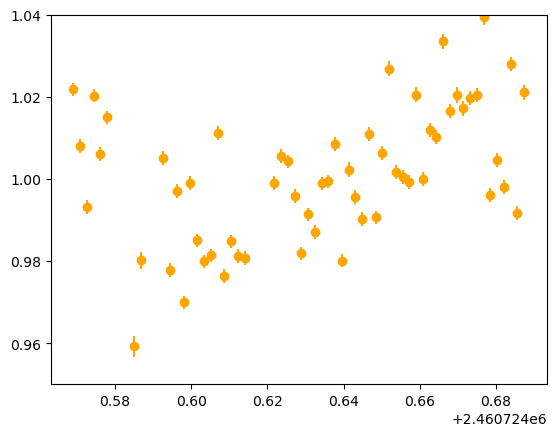

In [31]:
# plt.scatter(t,wasp36_flux, label='WASP-36b flux correction', color='orange')
plt.errorbar(t_sorted, wasp36_flux_sorted/np.nanmedian(wasp36_flux_sorted), 
             yerr=wasp36_err_sorted, 
             fmt='o', color='orange', label='WASP-36b error')
plt.ylim(0.95,1.04) 
# plt.ylim(0.75,2)
# plt.ylim(0,2.5)

(0.95, 1.04)

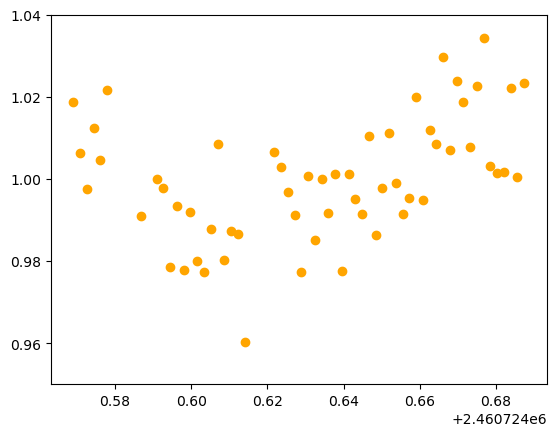

In [25]:
# plt.scatter(t,wasp36_flux, label='WASP-36b flux correction', color='orange')
plt.errorbar(t, wasp36_flux/np.nanmedian(wasp36_flux), 
             yerr=wasp36_err, 
             fmt='o', color='orange', label='WASP-36b error')
plt.ylim(0.95,1.04) 
# plt.ylim(0.75,2)
# plt.ylim(0,2.5)

(0.9, 1.2)

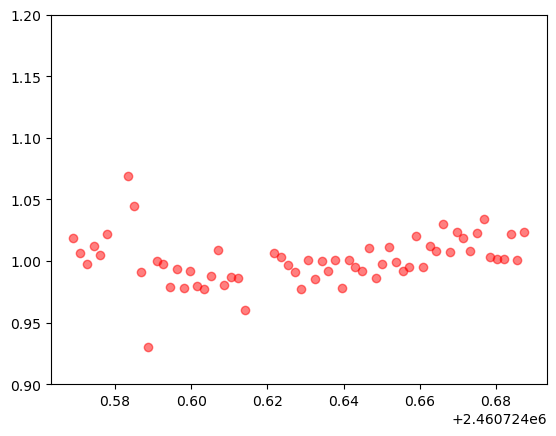

In [22]:
plt.scatter(t_sorted, wasp36_flux_sorted/np.median(wasp36_flux_sorted), label='WASP-36b flux correction (sorted)', color='red', alpha=0.5)
plt.ylim(0.9,1.2) 